In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importing the route data

In [3]:
# Get Directory
BASE_DIR = "D:/Code/RoutingChallenge/routing-challenge-az"

training_routes_path=os.path.join(BASE_DIR, 'data/model_build_inputs/route_data.json')

# Read route data
print('Reading Input Data')
df_route_data = pd.read_json(training_routes_path).T

Reading Input Data


In [4]:
df_route_data.shape

(6112, 6)

In [5]:
df_route_data.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ..."
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ..."
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't..."
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ..."
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '..."


In [6]:
df_route_data.isnull().sum()

station_code             0
date_YYYY_MM_DD          0
departure_time_utc       0
executor_capacity_cm3    0
route_score              0
stops                    0
dtype: int64

# 1. Departure Date and Time
Separate year, month and day and convert date to datetime object

In [7]:
df_route_data['departure_datetime'] = pd.to_datetime(df_route_data['date_YYYY_MM_DD']+\
                    df_route_data['departure_time_utc'],format="%Y-%m-%d%H:%M:%S")

df_route_data['year'] = df_route_data['departure_datetime'].apply(lambda d:d.year)
df_route_data['month'] = df_route_data['departure_datetime'].apply(lambda d:d.month)
df_route_data['day'] = df_route_data['departure_datetime'].apply(lambda d:d.day)
df_route_data['hour'] = df_route_data['departure_datetime'].apply(lambda d:d.hour)
df_route_data['minute'] = df_route_data['departure_datetime'].apply(lambda d:d.minute)
df_route_data['second'] = df_route_data['departure_datetime'].apply(lambda d:d.second)


In [8]:
df_route_data.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops,departure_datetime,year,month,day,hour,minute,second
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ...",2018-07-27 16:02:10,2018,7,27,16,2,10
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ...",2018-07-28 15:44:41,2018,7,28,15,44,41
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't...",2018-08-18 15:32:04,2018,8,18,15,32,4
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ...",2018-08-15 15:09:38,2018,8,15,15,9,38
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '...",2018-08-05 14:23:26,2018,8,5,14,23,26


In [9]:
df_route_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6112 entries, RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77 to RouteID_fffd257c-3041-4736-be7a-5efea8af1173
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   station_code           6112 non-null   object        
 1   date_YYYY_MM_DD        6112 non-null   object        
 2   departure_time_utc     6112 non-null   object        
 3   executor_capacity_cm3  6112 non-null   object        
 4   route_score            6112 non-null   object        
 5   stops                  6112 non-null   object        
 6   departure_datetime     6112 non-null   datetime64[ns]
 7   year                   6112 non-null   int64         
 8   month                  6112 non-null   int64         
 9   day                    6112 non-null   int64         
 10  hour                   6112 non-null   int64         
 11  minute                 6112 non-null   int6

In [10]:
df_route_data['year'].unique(),df_route_data['month'].unique(),\
df_route_data['day'].unique()

(array([2018], dtype=int64),
 array([7, 8], dtype=int64),
 array([27, 28, 18, 15,  5,  2,  1, 13,  4,  7, 31,  8,  3, 24, 21, 14, 10,
        17, 26, 29, 23,  6, 20, 25, 12, 16, 30, 22, 11,  9, 19],
       dtype=int64))

In [11]:
unique_days = df_route_data.groupby('month')['day'].unique()

unique_days=unique_days.apply(lambda x:set(x))

print(unique_days[7])
print(unique_days[8])

{19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}


### We can see that the data was gathered from 19-07-2018 to 26-08-2018

In [12]:
print(df_route_data['departure_datetime'].sort_values()[0])
print(df_route_data['departure_datetime'].sort_values()[-1])

2018-07-19 13:41:42
2018-08-26 16:14:30


## Hours

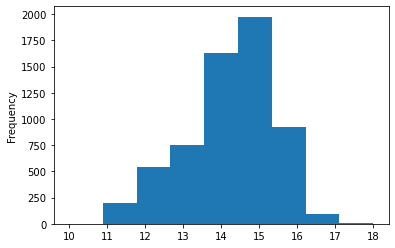

10       1
11     202
12     538
13     747
14    1626
15    1975
16     921
17      93
18       9
Name: hour, dtype: int64

In [13]:
df_route_data['hour'].plot(kind='hist', bins=9)
plt.show()
df_route_data['hour'].value_counts().sort_index()

# 2. Station Code

In [14]:
print("Number of unique stations:", len(df_route_data['station_code'].unique()))

Number of unique stations: 17


Number of deliveries per station

In [15]:
df_route_data.groupby('station_code')['departure_datetime'].nunique().sort_values()

station_code
DBO1      59
DSE2     125
DLA5     152
DCH2     154
DCH1     187
DLA4     189
DAU1     200
DLA3     239
DCH3     247
DBO2     276
DCH4     375
DLA8     435
DSE4     440
DBO3     475
DSE5     502
DLA9     685
DLA7    1016
Name: departure_datetime, dtype: int64

In [44]:
del_per_station = df_route_data.groupby('station_code')['departure_datetime'].count().sort_values()
del_per_station.name = 'del_per_station'
del_per_station

station_code
DBO1      60
DSE2     125
DCH2     154
DLA5     155
DCH1     196
DLA4     197
DAU1     214
DLA3     254
DCH3     271
DBO2     296
DCH4     381
DSE4     446
DLA8     448
DSE5     508
DBO3     573
DLA9     701
DLA7    1133
Name: del_per_station, dtype: int64

Some difference between two: Same departure time may suggest that the actual departure time was not recorded for those deliveries (guess!)

### Average stops per delivery per station code

In [45]:
df_route_data['num_stops'] = df_route_data['stops'].apply(lambda x: len(x))

In [46]:
avg_stops = df_route_data.groupby('station_code')['num_stops'].mean().sort_values()
avg_stops.name = 'avg_stops_per_station'
avg_stops

station_code
DSE2    104.696000
DLA3    117.129921
DCH1    124.459184
DLA8    129.033482
DBO1    137.750000
DLA4    138.233503
DBO2    139.939189
DLA9    141.058488
DSE4    143.827354
DAU1    146.140187
DLA7    154.343336
DSE5    154.620079
DCH2    155.227273
DBO3    158.699825
DLA5    167.077419
DCH4    167.797900
DCH3    185.166052
Name: avg_stops_per_station, dtype: float64

In [52]:
df_station_data = pd.concat([del_per_station,avg_stops],axis=1)
df_station_data

,del_per_station,avg_stops_per_station
station_code,,
DBO1,60,137.750000
DSE2,125,104.696000
DCH2,154,155.227273
DLA5,155,167.077419
DCH1,196,124.459184
DLA4,197,138.233503
DAU1,214,146.140187
DLA3,254,117.129921
DCH3,271,185.166052


Text(0, 0.5, 'Average number of stops')

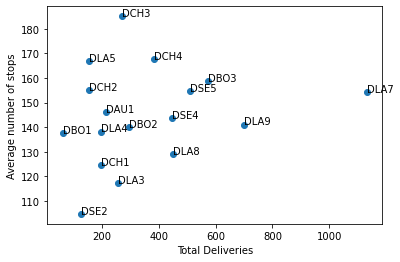

In [77]:
plt.scatter(df_station_data['del_per_station'],df_station_data['avg_stops_per_station'])
for idx,(x,y) in zip(df_station_data.index,df_station_data.values):
    plt.annotate(idx,(x,y))
plt.xlabel('Total Deliveries')
plt.ylabel('Average number of stops')

In [78]:
df_route_data.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops,departure_datetime,year,month,day,hour,minute,second,num_stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ...",2018-07-27 16:02:10,2018,7,27,16,2,10,119
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ...",2018-07-28 15:44:41,2018,7,28,15,44,41,106
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't...",2018-08-18 15:32:04,2018,8,18,15,32,4,128
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ...",2018-08-15 15:09:38,2018,8,15,15,9,38,142
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '...",2018-08-05 14:23:26,2018,8,5,14,23,26,155


# 3. Executor Capacity

In [87]:
df_route_data['executor_capacity_cm3'] = \
df_route_data['executor_capacity_cm3'].astype(np.float)

In [89]:
df_route_data['executor_capacity_cm3'].unique()

array([3313071.  , 4247527.  , 3114853.25])

In [92]:
df_route_data['executor_capacity_cm3'].value_counts()

3313071.00    4175
4247527.00    1926
3114853.25      11
Name: executor_capacity_cm3, dtype: int64

May be three types of delivery vehicles

In [95]:
# Delivery vehicles per station
df_route_data.groupby('station_code')['executor_capacity_cm3'].value_counts()

station_code  executor_capacity_cm3
DAU1          4247527.00                214
DBO1          4247527.00                 43
              3313071.00                 17
DBO2          4247527.00                154
              3313071.00                142
DBO3          4247527.00                433
              3313071.00                140
DCH1          3313071.00                187
              4247527.00                  9
DCH2          3313071.00                148
              4247527.00                  6
DCH3          3313071.00                185
              4247527.00                 86
DCH4          4247527.00                303
              3313071.00                 78
DLA3          3313071.00                254
DLA4          3313071.00                197
DLA5          3313071.00                150
              4247527.00                  5
DLA7          3313071.00               1133
DLA8          3313071.00                408
              4247527.00                

In [100]:
df_route_data.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops,departure_datetime,year,month,day,hour,minute,second,num_stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ...",2018-07-27 16:02:10,2018,7,27,16,2,10,119
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ...",2018-07-28 15:44:41,2018,7,28,15,44,41,106
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't...",2018-08-18 15:32:04,2018,8,18,15,32,4,128
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ...",2018-08-15 15:09:38,2018,8,15,15,9,38,142
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '...",2018-08-05 14:23:26,2018,8,5,14,23,26,155


# 4. Stops

In [103]:
# Min and Max number of stops
df_route_data['num_stops'].min(),df_route_data['num_stops'].max()

(33, 238)

<AxesSubplot:ylabel='Frequency'>

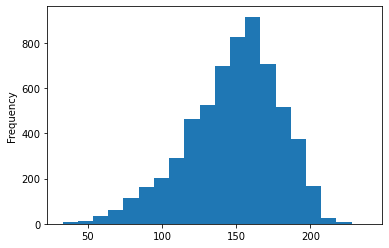

In [107]:
df_route_data['num_stops'].plot.hist(bins=20)

In [108]:
df_route_data['stops'][0]

{'AD': {'lat': 34.099611,
  'lng': -118.283062,
  'type': 'Dropoff',
  'zone_id': 'P-12.3C'},
 'AF': {'lat': 34.101587,
  'lng': -118.291125,
  'type': 'Dropoff',
  'zone_id': 'A-1.2D'},
 'AG': {'lat': 34.089727,
  'lng': -118.28553,
  'type': 'Dropoff',
  'zone_id': 'A-2.1A'},
 'BA': {'lat': 34.096132,
  'lng': -118.292869,
  'type': 'Dropoff',
  'zone_id': 'A-1.2C'},
 'BE': {'lat': 34.098482,
  'lng': -118.286243,
  'type': 'Dropoff',
  'zone_id': 'P-13.3B'},
 'BG': {'lat': 34.102251,
  'lng': -118.287403,
  'type': 'Dropoff',
  'zone_id': 'P-13.2A'},
 'BP': {'lat': 34.095585,
  'lng': -118.28179,
  'type': 'Dropoff',
  'zone_id': 'P-13.2C'},
 'BT': {'lat': 34.101474,
  'lng': -118.289609,
  'type': 'Dropoff',
  'zone_id': 'A-1.1D'},
 'BY': {'lat': 34.091721,
  'lng': -118.284539,
  'type': 'Dropoff',
  'zone_id': 'A-1.1A'},
 'BZ': {'lat': 34.098179,
  'lng': -118.281075,
  'type': 'Dropoff',
  'zone_id': 'P-13.1C'},
 'CA': {'lat': 34.100562,
  'lng': -118.290796,
  'type': 'Dropoff'

In [109]:
df_stop = pd.DataFrame(df_route_data['stops'][0])

In [110]:
df_stop

,AD,AF,AG,BA,BE,BG,BP,BT,BY,BZ,CA,CG,CK,CM,CO,CP,CW,DJ,DL,DN,DQ,EC,EH,EO,EX,EY,FF,FH,FY,GB,GN,GP,GS,GU,GW,HB,HG,HN,HO,HR,HT,HW,IA,IJ,IM,IP,IW,JH,JM,KA,KG,KJ,KM,KN,KP,KU,LB,LD,LG,LK,LY,MA,MO,MQ,MR,MW,NE,NL,NM,NR,NU,PB,PJ,PS,PT,PX,QE,QM,QO,QX,RA,RG,RY,SC,SD,SF,SI,SQ,TC,TG,TH,TK,TQ,TY,UI,UJ,UN,UR,US,UU,UW,VA,VC,VE,VW,WJ,WS,XB,XD,YE,YH,YJ,YN,YR,YY,ZB,ZE,ZP,ZU
lat,34.099611,34.101587,34.089727,34.096132,34.098482,34.102251,34.095585,34.101474,34.091721,34.098179,34.100562,34.093119,34.095794,34.097235,34.1018,34.096991,34.093458,34.09039,34.094262,34.096991,34.097468,34.100006,34.098182,34.096917,34.09914,34.097596,34.096966,34.093868,34.088782,34.091462,34.099634,34.088709,34.096958,34.095431,34.091259,34.097631,34.096383,34.096583,34.090795,34.09959,34.088717,34.097272,34.096205,34.093126,34.096024,34.096993,34.095705,34.09289,34.098539,34.101797,34.101133,34.099091,34.100535,34.094347,34.092428,34.095811,34.093152,34.099557,34.091648,34.09483,34.094895,34.09491,34.09637,34.095091,34.09451,34.101063,34.100619,34.091351,34.089111,34.092186,34.096542,34.099181,34.091681,34.093749,34.09581,34.100883,34.095318,34.090901,34.100003,34.097948,34.094442,34.099046,34.090961,34.0915,34.10082,34.092285,34.096955,34.099043,34.100716,34.088467,34.095641,34.094506,34.101021,34.099138,34.099902,34.098157,34.099871,34.091408,34.093403,34.101004,34.0954,34.094216,34.098179,34.007369,34.093177,34.099992,34.089433,34.09346,34.098095,34.097061,34.097287,34.098948,34.096363,34.090347,34.100902,34.098661,34.093294,34.099485,34.09701
lng,-118.283062,-118.291125,-118.28553,-118.292869,-118.286243,-118.287403,-118.28179,-118.289609,-118.284539,-118.281075,-118.290796,-118.291761,-118.279086,-118.276636,-118.286716,-118.290254,-118.284798,-118.293879,-118.283726,-118.290254,-118.291886,-118.282101,-118.279915,-118.285385,-118.282492,-118.279776,-118.278668,-118.283305,-118.282842,-118.282166,-118.289397,-118.284839,-118.283054,-118.286601,-118.281142,-118.278111,-118.278688,-118.294127,-118.28258,-118.286258,-118.286484,-118.275631,-118.284572,-118.286591,-118.279795,-118.277969,-118.287525,-118.282396,-118.276077,-118.290697,-118.2874,-118.28993,-118.288505,-118.285564,-118.2878,-118.282443,-118.282542,-118.291764,-118.29175,-118.280816,-118.278862,-118.282442,-118.277801,-118.281013,-118.28895,-118.288518,-118.29239,-118.293884,-118.283641,-118.285547,-118.283056,-118.28625,-118.280876,-118.27956,-118.284534,-118.28602,-118.279716,-118.284257,-118.281338,-118.286795,-118.281417,-118.28306,-118.281325,-118.286608,-118.283959,-118.283236,-118.277191,-118.278424,-118.291027,-118.284521,-118.289226,-118.283993,-118.273982,-118.28142,-118.287399,-118.289765,-118.280658,-118.292792,-118.281442,-118.283957,-118.29115,-118.293212,-118.282761,-118.143927,-118.283405,-118.284328,-118.283433,-118.286891,-118.277802,-118.284074,-118.292869,-118.280668,-118.277216,-118.282857,-118.285704,-118.285183,-118.292799,-118.278658,-118.281945
type,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Station,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff,Dropoff
zone_id,P-12.3C,A-1.2D,A-2.1A,A-1.2C,P-13.3B,P-13.2A,P-13.2C,A-1.1D,A-1.1A,P-13.1C,A-1.2D,A-1.